In [1]:
import numpy as np
import pandas as pd

In [4]:
veriseti=pd.read_csv('/content/veriseti.csv')
veriseti=veriseti.drop('Unnamed: 0',axis=1)

In [7]:
veriseti.head()

,Yas,Cinsiyet,SistolikKanBasinci,DiyastolikKanBasinci,Kolestrol,KanSekeri,Nabiz,Hastalik
0,64,1,141,107,274,70,63,1
1,67,0,158,105,212,131,66,1
2,73,0,142,116,225,159,75,0
3,20,1,124,104,253,172,89,0
4,23,1,171,97,221,141,81,0


In [6]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.tree import plot_tree

In [10]:
x=veriseti.drop('Hastalik',axis=1)
y=veriseti['Hastalik']

In [11]:
x_egitim, x_test, y_egitim, y_test = train_test_split(

    x, y, test_size=0.3, random_state=0
)

In [14]:
rf = RandomForestClassifier(n_estimators=100,random_state=0)
rf.fit(x_egitim,y_egitim)

RandomForestClassifier(random_state=0)

In [15]:
y_tahmin=rf.predict(x_test)
accurary = accuracy_score(y_test,y_tahmin)
rapor = classification_report(y_test,y_tahmin)

In [24]:
print(accurary)
print(rapor)

0.6866666666666666
              precision    recall  f1-score   support

           0       0.69      0.56      0.62       137
           1       0.68      0.79      0.73       163

    accuracy                           0.69       300
   macro avg       0.69      0.68      0.68       300
weighted avg       0.69      0.69      0.68       300



In [31]:
from google.colab import files

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

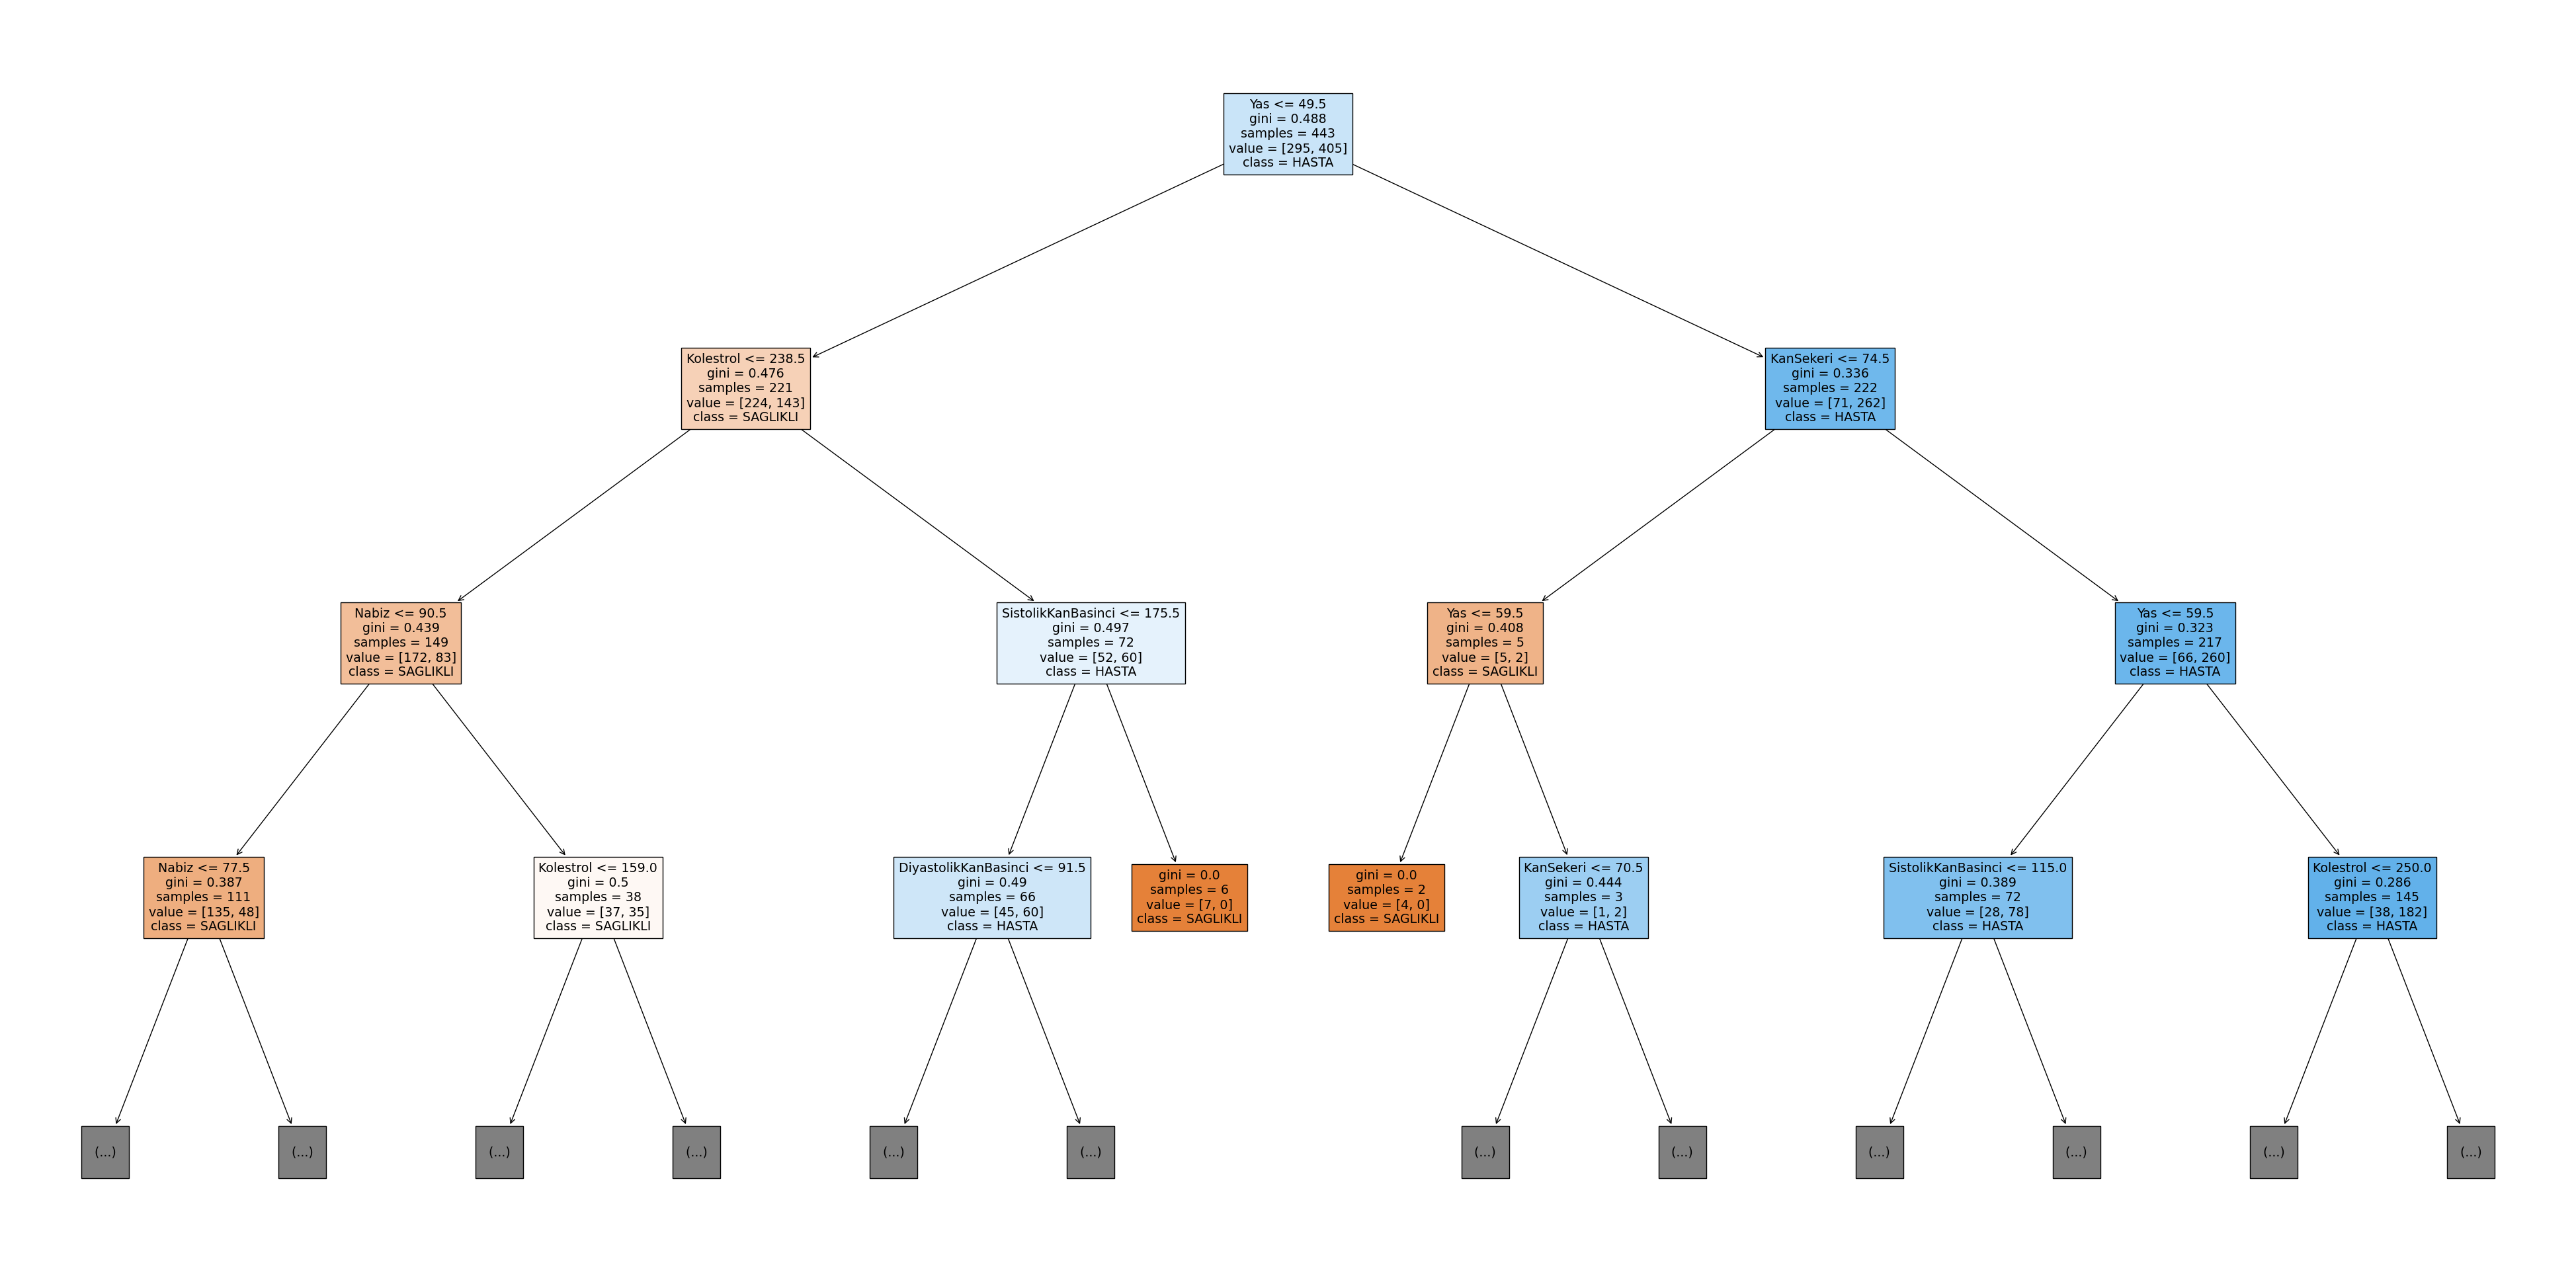

In [33]:
plt.figure(figsize=(50,25))
plot_tree(
    rf.estimators_[0],
    filled=True,
    feature_names=x.columns,
    class_names=['SAGLIKLI','HASTA'],
    max_depth=3
)
plt.savefig('randomForestGrafigi.png')
files.download('randomForestGrafigi.png')
plt.show()